In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping

In [22]:
dataset_train = pd.read_csv("Google_Stock_Price_Train.csv")
dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [23]:
dataset_train.shape

(1258, 6)

In [24]:
training_set = dataset_train.iloc[:,1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [25]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaler = sc.fit_transform(training_set)
training_set_scaler

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [26]:
X_train = []
y_train = []
for i in range(60, 1258):
  X_train.append(training_set_scaler[i-60:i,0])
  y_train.append(training_set_scaler[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [27]:
print(X_train)

[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]


In [28]:
X_train.shape

(1198, 60)

In [29]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [30]:
X_train.shape

(1198, 60, 1)

In [31]:
modelo = Sequential()
modelo.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
modelo.add(Dropout(0.2))
modelo.add(LSTM(units=50, return_sequences=True))
modelo.add(Dropout(0.2))
modelo.add(LSTM(units=50))
modelo.add(Dropout(0.2))
modelo.add(Dense(units=1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
modelo.compile(optimizer="adam", loss="mean_squared_error")

es = EarlyStopping(monitor="loss", mode="min", verbose=1, patience=30)

modelo.fit(X_train, y_train, epochs=500, batch_size=32, callbacks=[es])

Epoch 1/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0805
Epoch 2/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0066
Epoch 3/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0048
Epoch 4/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0057
Epoch 5/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0050
Epoch 6/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0046
Epoch 7/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0042
Epoch 8/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0036
Epoch 9/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0038
Epoch 10/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0032
Epoch 11/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0039
Epoch 12/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0039
Epoch 13/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0039
Epoch 14/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0029
Epoch 15/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - lo

In [33]:
dataset_test = pd.read_csv("Google_Stock_Price_Test.csv")
real_stock_price = dataset_test.iloc[:,1:2].values

In [35]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)

In [39]:
inputs = dataset_total[len(dataset_total)-len(dataset_test) - 60:].values
inputs

array([779.  , 779.66, 777.71, 786.66, 783.76, 781.22, 781.65, 779.8 ,
       787.85, 798.24, 803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  ,
       808.35, 795.47, 782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 ,
       779.94, 791.17, 756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37,
       762.61, 772.63, 767.73, 764.26, 760.  , 771.53, 770.07, 757.44,
       744.59, 757.71, 764.73, 761.  , 772.48, 780.  , 785.04, 793.9 ,
       797.4 , 797.34, 800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 ,
       790.68, 793.7 , 783.33, 782.75, 778.81, 788.36, 786.08, 795.26,
       806.4 , 807.86, 805.  , 807.14, 807.48, 807.08, 805.81, 805.12,
       806.91, 807.25, 822.3 , 829.62, 837.81, 834.71, 814.66, 796.86])

In [41]:
inputs = inputs.reshape(-1,1)
inputs

array([[779.  ],
       [779.66],
       [777.71],
       [786.66],
       [783.76],
       [781.22],
       [781.65],
       [779.8 ],
       [787.85],
       [798.24],
       [803.3 ],
       [795.  ],
       [804.9 ],
       [816.68],
       [806.34],
       [801.  ],
       [808.35],
       [795.47],
       [782.89],
       [778.2 ],
       [767.25],
       [750.66],
       [774.5 ],
       [783.4 ],
       [779.94],
       [791.17],
       [756.54],
       [755.6 ],
       [746.97],
       [755.2 ],
       [766.92],
       [771.37],
       [762.61],
       [772.63],
       [767.73],
       [764.26],
       [760.  ],
       [771.53],
       [770.07],
       [757.44],
       [744.59],
       [757.71],
       [764.73],
       [761.  ],
       [772.48],
       [780.  ],
       [785.04],
       [793.9 ],
       [797.4 ],
       [797.34],
       [800.4 ],
       [790.22],
       [796.76],
       [795.84],
       [792.36],
       [790.9 ],
       [790.68],
       [793.7 ],
       [783.33

In [42]:
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
  X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]))
predicted_stock_price = modelo.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


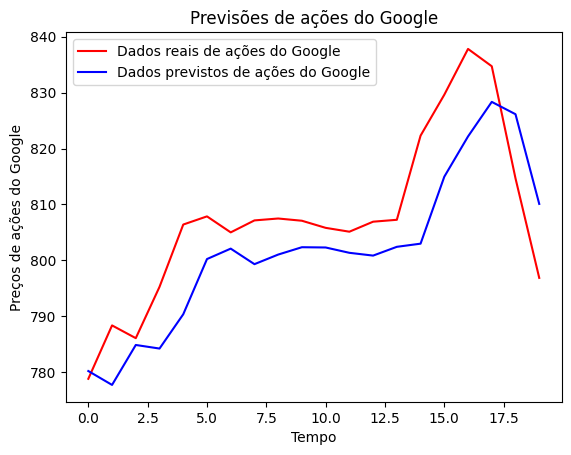

In [44]:
plt.plot(real_stock_price, color='red', label='Dados reais de ações do Google')
plt.plot(predicted_stock_price, color='blue', label="Dados previstos de ações do Google")
plt.title("Previsões de ações do Google")
plt.xlabel("Tempo")
plt.ylabel("Preços de ações do Google")
plt.legend()
plt.show()